<h1 style="font-size:2em">Projet 5 - Segmentez des clients d'un site e-commerce</h1>

# Objectifs

# Imports et configs

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [3]:
df = pd.read_csv('data_cluster.csv', sep = ",")

In [4]:
df

,cluster,customer_unique_id,recency,frequency,monetary_value,review_score
0,0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,5.0
1,0,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,4.0
2,0,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
3,0,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
4,0,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0
...,...,...,...,...,...,...
82158,0,fffcf5a5ff07b0908bd4e2dbc735a684,447,1,2067.42,5.0
82159,0,fffea47cd6d3cc0a88bd621562a9d061,262,1,84.58,4.0
82160,0,ffff371b4d645b6ecea244b27531430a,568,1,112.46,5.0
82161,0,ffff5962728ec6157033ef9805bacc48,119,1,133.69,5.0


# Option A: Tout les clients

## Contrat de maintenance

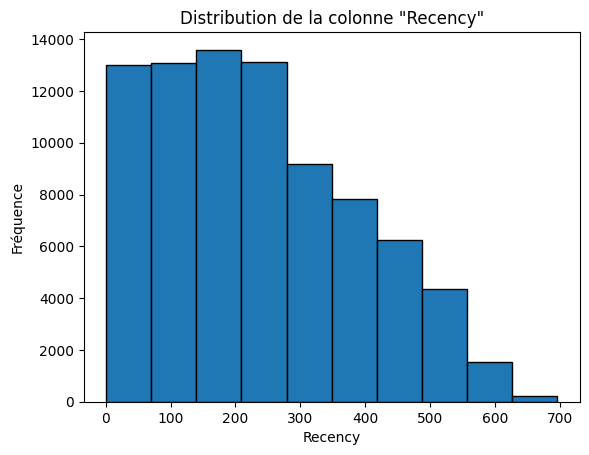

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Spécifiez le nombre de bins (10 dans votre cas)
num_bins = 10

# Créez le plot en barres avec les bins
plt.hist(df['recency'], bins=num_bins, edgecolor='black')

# Ajoutez des étiquettes et un titre au plot
plt.xlabel('Recency')
plt.ylabel('Fréquence')
plt.title('Distribution de la colonne "Recency"')

# Affichez le plot
plt.show()

range(695, 0, -50)


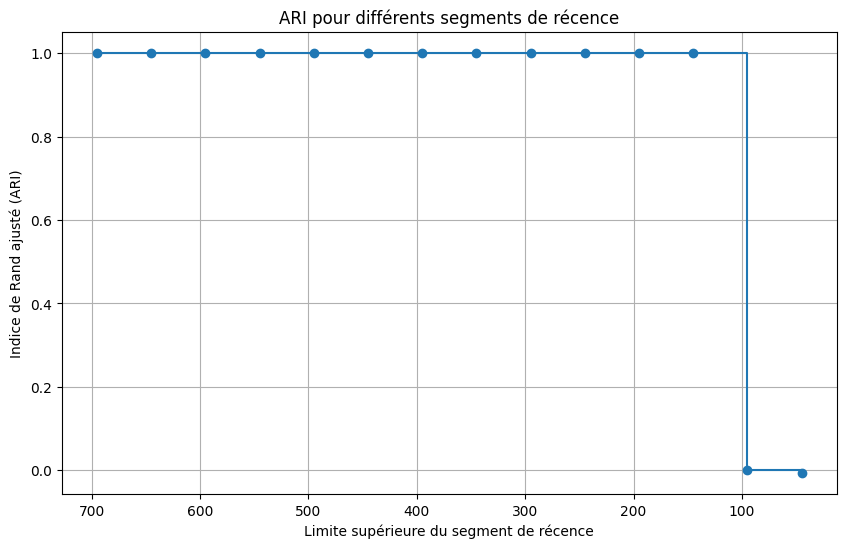

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd

nb_jours = 50
k = 2
data = df 


# Fonction pour aligner les clusters
def align_clusters(a, b):
    """
    Aligner les clusters dans b aux clusters dans a.
    """
    # Obtenir la matrice de confusion
    confusion_matrix = pd.crosstab(a, b).values
    # Utiliser l'algorithme hongrois pour trouver l'alignement optimal
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    # Créer une correspondance des anciens labels vers les nouveaux labels
    mapping = dict(zip(col_ind, row_ind))
    # Utiliser cette correspondance pour aligner les clusters dans b
    aligned_b = b.replace(mapping)
    return aligned_b

# Sélectionner les caractéristiques pour le clustering
features = ["recency", "frequency", "monetary_value", "review_score"]

# Définir la segmentation de la récence à partir de la récence maximale
recency_segmentation = range(data['recency'].max(), data['recency'].min() - 1, -nb_jours)
print(recency_segmentation)

# Initialiser les listes pour stocker les résultats
segments = []
aris = []

# Boucle sur les segments
for i in recency_segmentation:
    # Obtenir les données pour le segment actuel
    segment_data = data[(data['recency'] >= data['recency'].min()) & (data['recency'] <= i)].copy()
    # Passer cette itération si les données du segment sont vides
    if segment_data.empty:
        continue
    
    # Standardiser les caractéristiques
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(segment_data[features])
    
    # Adapter le modèle KMeans
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    if len(segment_data) >= k:
        kmeans.fit(data_scaled)
    else:
        # Passer cette itération ou ajuster le nombre de clusters
        continue

    # Créer une nouvelle colonne avec les nouvelles attributions de cluster
    segment_data.loc[:, 'new_cluster'] = kmeans.labels_

    # Aligner les nouveaux clusters sur les clusters originaux
    segment_data.loc[:, 'new_cluster'] = align_clusters(segment_data['cluster'], segment_data['new_cluster'])
    
    # Calculer l'indice de Rand ajusté
    ari = adjusted_rand_score(segment_data['cluster'], segment_data['new_cluster'])
    
    # Ajouter les résultats aux listes
    segments.append(i)
    aris.append(ari)
    
# Créer le graphique
plt.figure(figsize=(10,6))
plt.plot(segments, aris, marker='o', drawstyle='steps-post')
plt.xlabel('Limite supérieure du segment de récence')
plt.ylabel('Indice de Rand ajusté (ARI)')
plt.title('ARI pour différents segments de récence')
plt.gca().invert_xaxis()  # Inverser l'axe des x
plt.grid()
plt.show()

# Option B: Seulement les clients ayant effectué 2 commandes ou plus

## Contrat de maintenance

In [7]:
df = pd.read_csv('data_cluster_2_orders_or_more.csv', sep = ",")

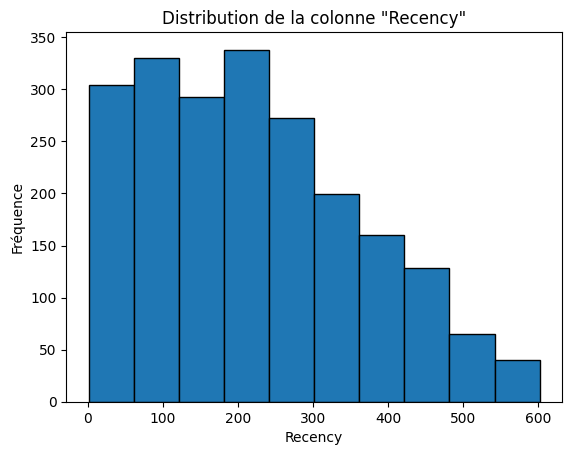

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Spécifiez le nombre de bins (10 dans votre cas)
num_bins = 10

# Créez le plot en barres avec les bins
plt.hist(df['recency'], bins=num_bins, edgecolor='black')

# Ajoutez des étiquettes et un titre au plot
plt.xlabel('Recency')
plt.ylabel('Fréquence')
plt.title('Distribution de la colonne "Recency"')

# Affichez le plot
plt.show()

range(602, 0, -40)


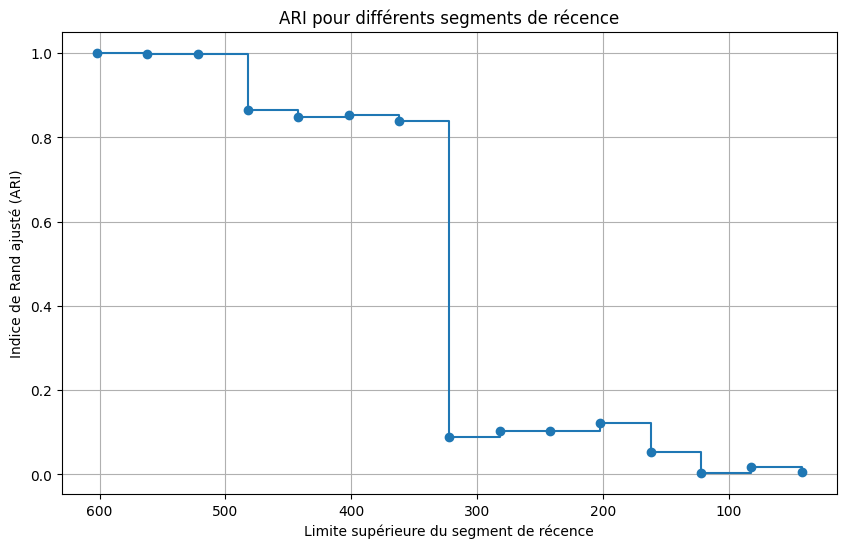

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.optimize import linear_sum_assignment
import numpy as np
import pandas as pd

nb_jours = 40
k = 3
data = df 


# Fonction pour aligner les clusters
def align_clusters(a, b):
    """
    Aligner les clusters dans b aux clusters dans a.
    """
    # Obtenir la matrice de confusion
    confusion_matrix = pd.crosstab(a, b).values
    # Utiliser l'algorithme hongrois pour trouver l'alignement optimal
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    # Créer une correspondance des anciens labels vers les nouveaux labels
    mapping = dict(zip(col_ind, row_ind))
    # Utiliser cette correspondance pour aligner les clusters dans b
    aligned_b = b.replace(mapping)
    return aligned_b

# Sélectionner les caractéristiques pour le clustering
features = ["recency", "frequency", "monetary_value", "review_score"]

# Définir la segmentation de la récence à partir de la récence maximale
recency_segmentation = range(data['recency'].max(), data['recency'].min() - 1, -nb_jours)
print(recency_segmentation)

# Initialiser les listes pour stocker les résultats
segments = []
aris = []

# Boucle sur les segments
for i in recency_segmentation:
    # Obtenir les données pour le segment actuel
    segment_data = data[(data['recency'] >= data['recency'].min()) & (data['recency'] <= i)].copy()
    # Passer cette itération si les données du segment sont vides
    if segment_data.empty:
        continue
    
    # Standardiser les caractéristiques
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(segment_data[features])
    
    # Adapter le modèle KMeans
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    if len(segment_data) >= k:
        kmeans.fit(data_scaled)
    else:
        # Passer cette itération ou ajuster le nombre de clusters
        continue

    # Créer une nouvelle colonne avec les nouvelles attributions de cluster
    segment_data.loc[:, 'new_cluster'] = kmeans.labels_

    # Aligner les nouveaux clusters sur les clusters originaux
    segment_data.loc[:, 'new_cluster'] = align_clusters(segment_data['cluster'], segment_data['new_cluster'])
    
    # Calculer l'indice de Rand ajusté
    ari = adjusted_rand_score(segment_data['cluster'], segment_data['new_cluster'])
    
    # Ajouter les résultats aux listes
    segments.append(i)
    aris.append(ari)
    
# Créer le graphique
plt.figure(figsize=(10,6))
plt.plot(segments, aris, marker='o', drawstyle='steps-post')
plt.xlabel('Limite supérieure du segment de récence')
plt.ylabel('Indice de Rand ajusté (ARI)')
plt.title('ARI pour différents segments de récence')
plt.gca().invert_xaxis()  # Inverser l'axe des x
plt.grid()
plt.show()